In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib widget
import seisbench
import seisbench.models as sbm

import obspy
from obspy import read_inventory

from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import obspy.signal.trigger as trigger
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plot_working
import event_processing
import loading_stream_function

import matplotlib.ticker as ticker

In [3]:
model = sbm.GPD()

In [4]:
import torch

x = torch.rand(1, 3, 400)  # 1 example, 3 components, 400 samples
model.eval()
#with torch.no_grad():
#    print(model(x))

GPD(
  (conv1): Conv1d(3, 32, kernel_size=(21,), stride=(1,), padding=(10,))
  (bn1): BatchNorm1d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(15,), stride=(1,), padding=(7,))
  (bn2): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(11,), stride=(1,), padding=(5,))
  (bn3): BatchNorm1d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(128, 256, kernel_size=(9,), stride=(1,), padding=(4,))
  (bn4): BatchNorm1d(256, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6400, out_features=200, bias=True)
  (bn5): BatchNorm1d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (bn6): BatchNorm1d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=200, out_featu

In [5]:
pretrained_weights = sbm.GPD.list_pretrained(details=True)
#for key, value in pretrained_weights.items():
#    print(f"{key}:\n{value}\n-----------------------\n")

In [6]:
model = sbm.GPD.from_pretrained("original")
#print(model.weights_docstring)

In [7]:
from obspy.clients.fdsn import Client
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' ]#, 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
time = obspy.UTCDateTime("2020-01-10T07:53:13")

start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600

#starttime = time - 60 
#endtime = time + 60


#stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))
client = Client("IRIS")

net = "7F"
sta = "A04"
loc = ""
chan = "GH?"
stream = client.get_waveforms(net, sta, loc, chan, start_time, end_time)
#stream = client.get_waveforms(network="7F", station="A04", location="*", channel="HH?", starttime=start_time-60, endtime=start_time+60)

In [8]:
start_time

2020-01-15T15:00:00.000000Z

In [12]:
stream

3 Trace(s) in Stream:
7F.A04..GH1 | 2020-01-15T15:00:00.000000Z - 2020-01-15T16:00:00.000000Z | 1000.0 Hz, 3600001 samples
7F.A04..GH2 | 2020-01-15T15:00:00.000000Z - 2020-01-15T16:00:00.000000Z | 1000.0 Hz, 3600001 samples
7F.A04..GHZ | 2020-01-15T15:00:00.000000Z - 2020-01-15T16:00:00.000000Z | 1000.0 Hz, 3600001 samples

In [9]:
end_time

2020-01-15T16:00:00.000000Z

In [11]:
#endtime

In [ ]:
endtime - starttime

In [13]:
win_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T15:21:47')
data_window = event_processing.get_waveforms_window(stream,win_time)

2020-01-15T15:21:46.900000Z
2020-01-15T15:21:47.800000Z


In [18]:
#data_window[0].times()

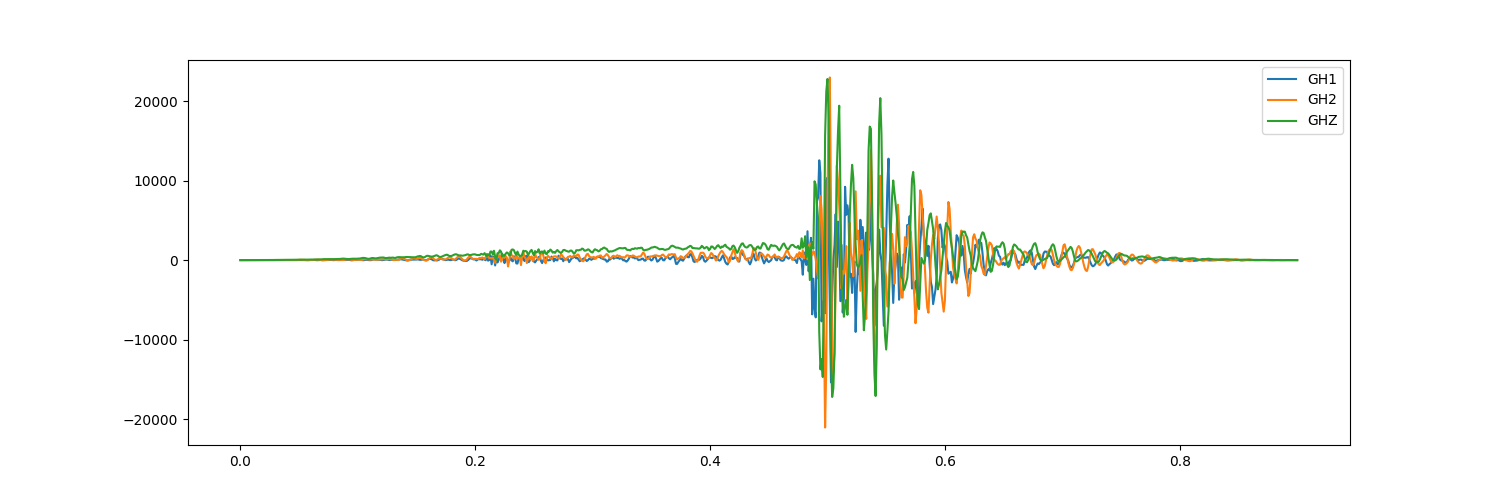

In [19]:

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for i in range(3):
    ax.plot(data_window[i].times(), data_window[i].data, label=data_window[i].stats.channel)
ax.legend()


In [29]:
annotations = model.annotate(data_window,20)
print(annotations)

2022-09-08 14:52:55,555 | seisbench | WARNING | Parts of the input stream consist of fragments shorter than the number of input samples. Output might be empty.


0 Trace(s) in Stream:



In [30]:
model = sbm.EQTransformer.from_pretrained("original")
print(model.weights_docstring)

Original (conservative) EQTransformer model from Mousavi et al. (2020). Originally published under MIT License. Original available at https://github.com/smousavi05/EQTransformer/blob/01bf112a00c1a3bbb43adb2c7dba3e21b5fbcdb9/ModelsAndSampleData/EqT_model_conservative.h5 . 

Converted to SeisBench by Jannes Münchmeyer (munchmej@gfz-potsdam.de) and Calum Chamberlain (calum.chamberlain@vuw.ac.nz).


3 Trace(s) in Stream:
7F.A04..EQTransformer_Detection | 2020-01-15T15:00:05.000000Z - 2020-01-15T15:59:55.000000Z | 100.0 Hz, 359001 samples
7F.A04..EQTransformer_P         | 2020-01-15T15:00:05.000000Z - 2020-01-15T15:59:55.000000Z | 100.0 Hz, 359001 samples
7F.A04..EQTransformer_S         | 2020-01-15T15:00:05.000000Z - 2020-01-15T15:59:55.000000Z | 100.0 Hz, 359001 samples


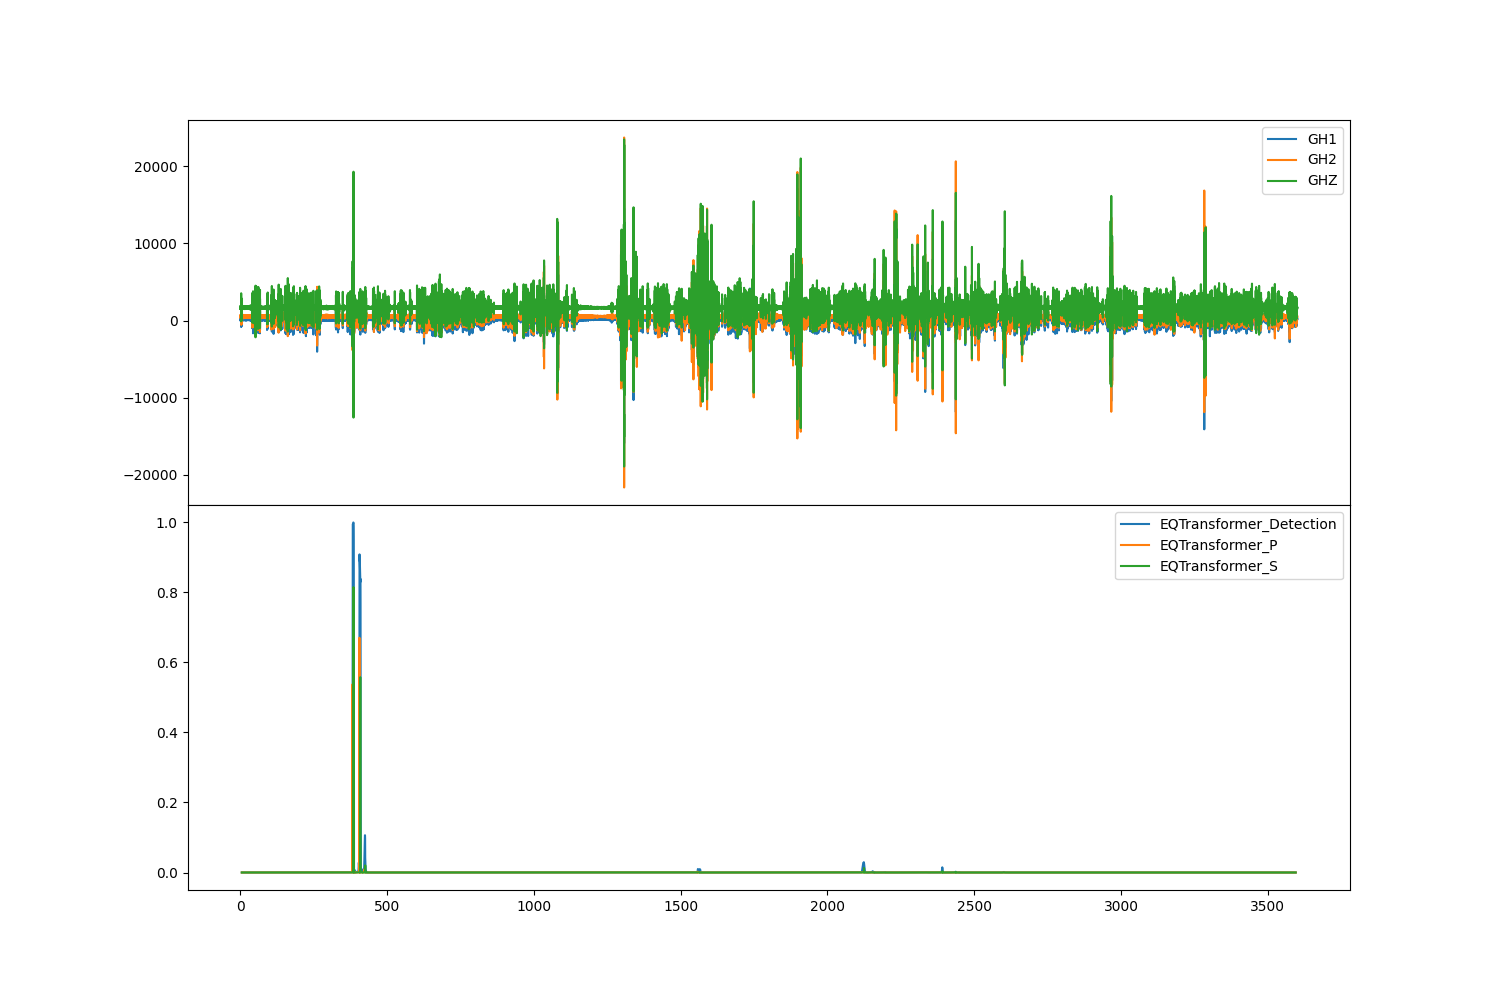

In [34]:
annotations = model.annotate(stream)
print(annotations)
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    if annotations[i].stats.channel[-1] != "N":  # Do not plot noise curve
        axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

In [24]:
data_window

3 Trace(s) in Stream:
7F.A04..GH1 | 2020-01-15T15:21:46.900000Z - 2020-01-15T15:21:47.800000Z | 1000.0 Hz, 901 samples
7F.A04..GH2 | 2020-01-15T15:21:46.900000Z - 2020-01-15T15:21:47.800000Z | 1000.0 Hz, 901 samples
7F.A04..GHZ | 2020-01-15T15:21:46.900000Z - 2020-01-15T15:21:47.800000Z | 1000.0 Hz, 901 samples

In [ ]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    if annotations[i].stats.channel[-1] != "N":  # Do not plot noise curve
        axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

In [ ]:
picks = model.classify(stream, P_threshold=0.90, S_threshold=0.67)
print("Picks:")
for pick in picks:
    print(pick)

In [ ]:
model = sbm.EQTransformer.from_pretrained("original")

In [ ]:
annotations = model.annotate(stream)
print(annotations)

fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    if annotations[i].stats.channel[-1] != "N":  # Do not plot noise curve
        axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

In [ ]:
picks, detections = model.classify(stream)
print("Picks:")
for pick in picks:
    print(pick)

print("\nDetections:")    
for detection in detections:
    print(detection)